<a href="https://colab.research.google.com/github/Catifode/Catifode/blob/main/Coding_Task_Completed_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/xray_images/

/content/drive/MyDrive/xray_images


In [4]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
import random

In [5]:
ROOT_DIR = "/content/drive/MyDrive/xray_images"
imgs = ['COVID','Normal','Lung_Opacity','Viral Pneumonia']

NEW_DIR = "/content/img_dir/"

In [6]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)

else:
  print("Already Exist")

In [7]:
counter = {'COVID':0,'Normal':0,'Lung_Opacity':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 3616, 'Normal': 10192, 'Lung_Opacity': 6012, 'Viral Pneumonia': 1345}

In [8]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Covid")
  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/train/Viral Pneumonia")


  os.makedirs(NEW_DIR+"train_test_split/test/Covid")
  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/test/Viral Pneumonia")

  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")
  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Lung_Opacity")
  os.makedirs(NEW_DIR+"train_test_split/validation/Viral Pneumonia")


  for i in np.random.choice(replace= False , size= 2532 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 7134 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 4208 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 941 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Viral Pneumonia" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 542 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1529 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 902 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 202 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Viral Pneumonia" )
    os.remove(i)


  for i in np.random.choice(replace= False , size= 542 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 1529 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 902 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Lung_Opacity" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 202 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Viral Pneumonia" )
    os.remove(i)

In [9]:
train_path  = "/content/img_dir/train_test_split/train"
test_path  = "/content/img_dir/train_test_split/test"
valid_path   = "/content/img_dir/train_test_split/validation"

In [10]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D

In [11]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 14815 images belonging to 4 classes.


In [12]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 3175 images belonging to 4 classes.


In [13]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 3175 images belonging to 4 classes.


In [14]:
class_type = {0:'Covid', 1 : 'Normal', 2:'Lung_Opacity', 3 : 'Viral Pneumonia'}

In [15]:
t_img , label = train.next()

In [16]:
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

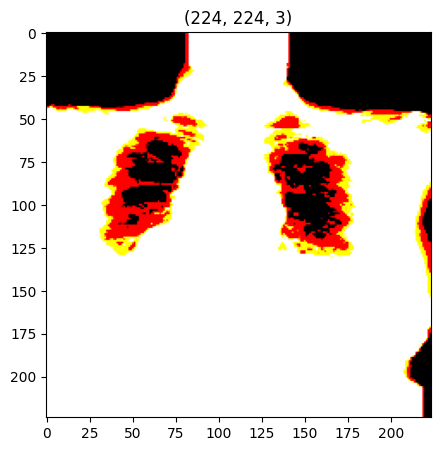

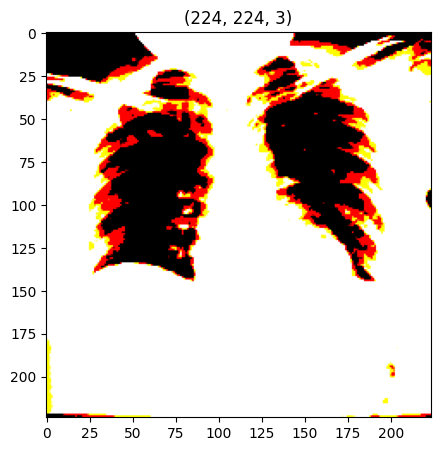

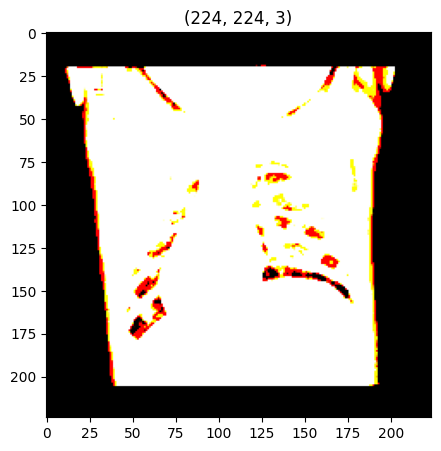

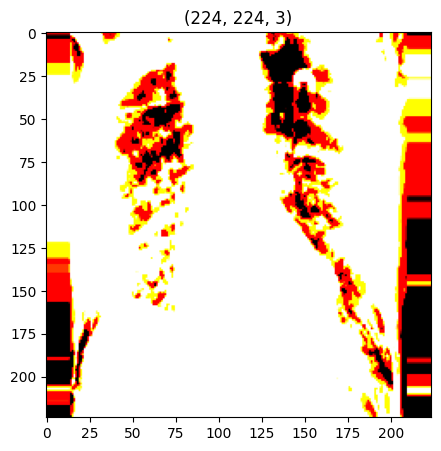

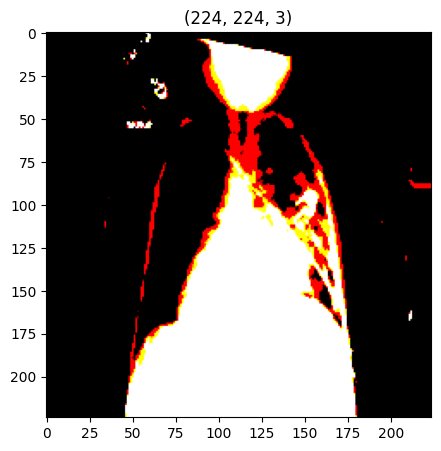

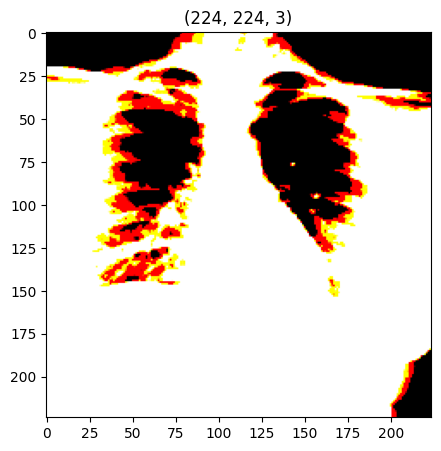

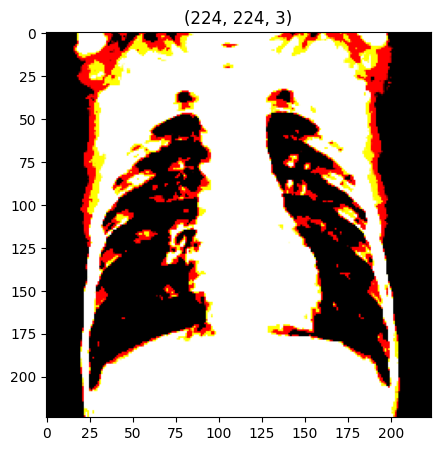

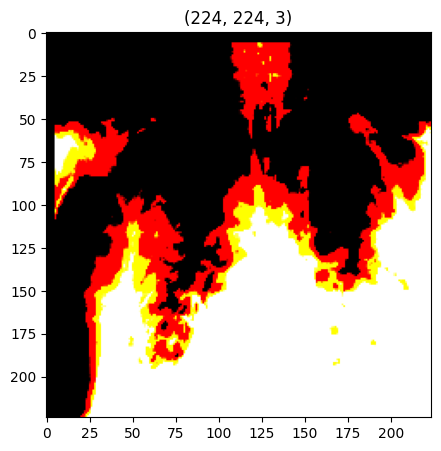

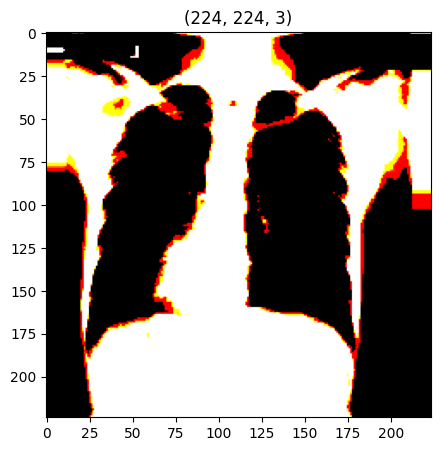

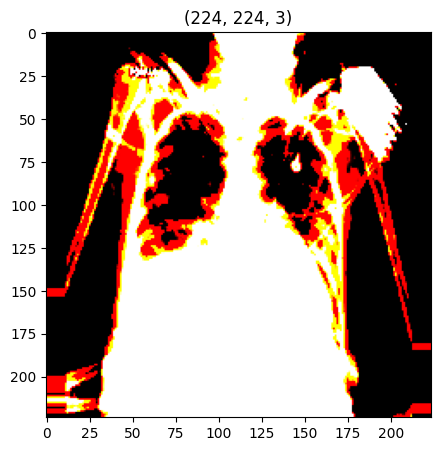

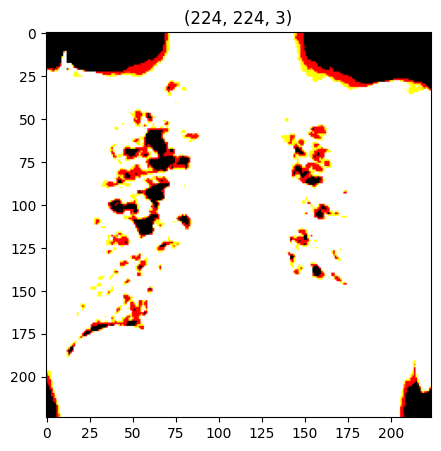

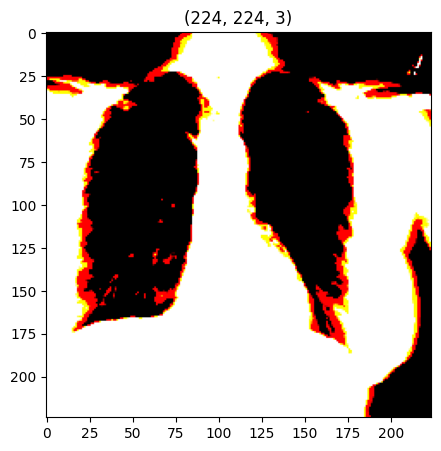

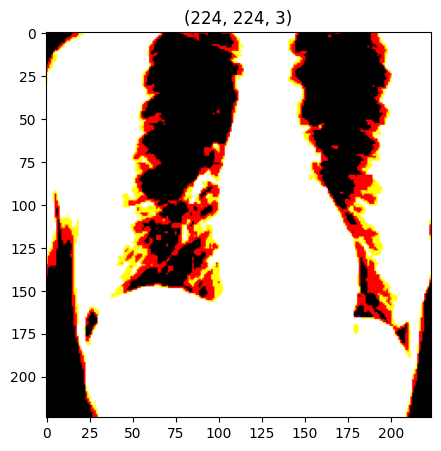

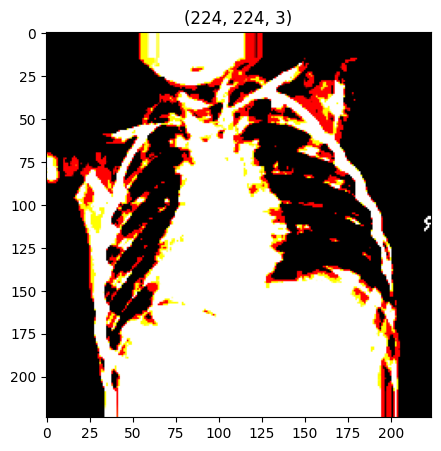

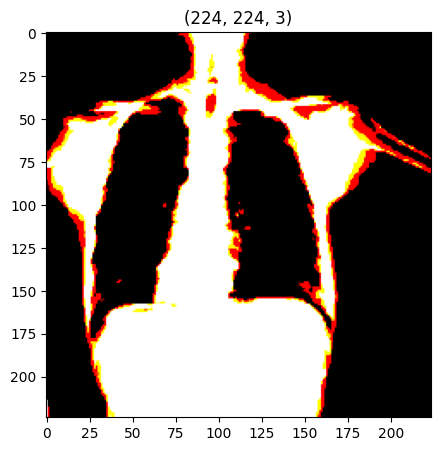

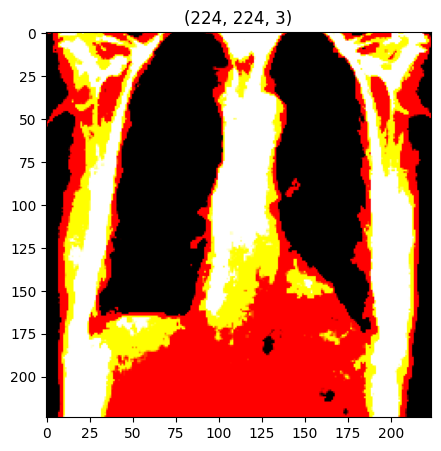

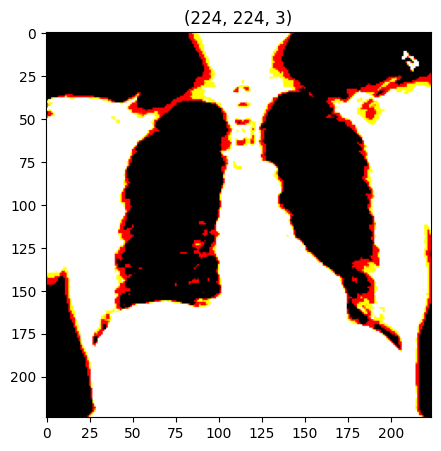

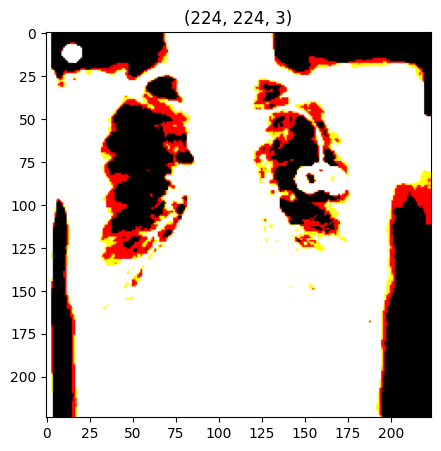

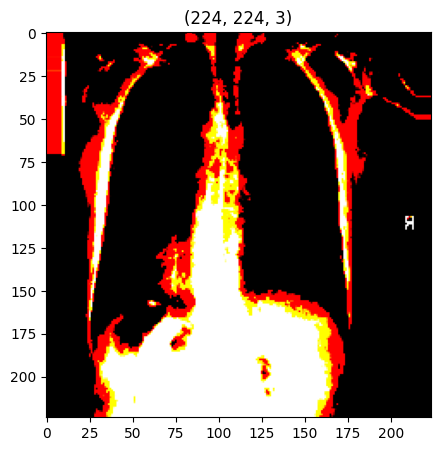

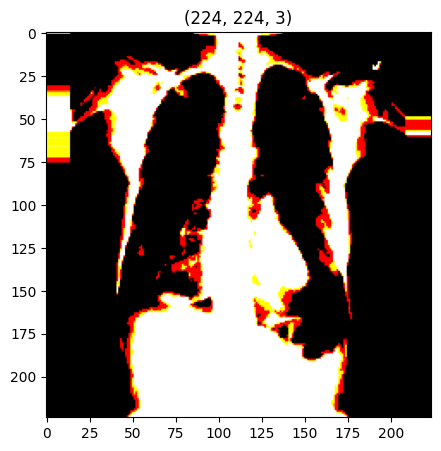

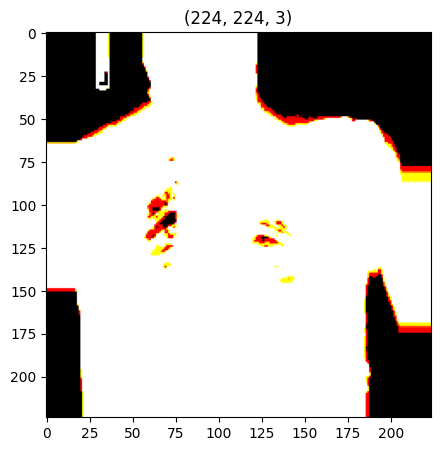

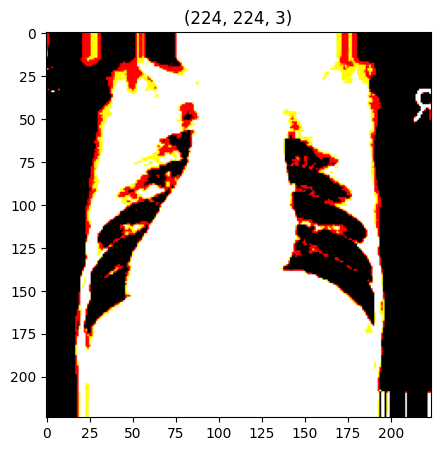

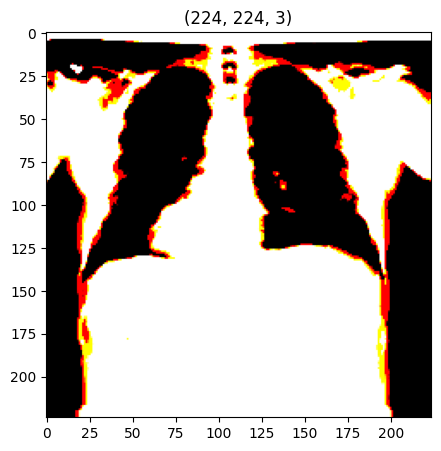

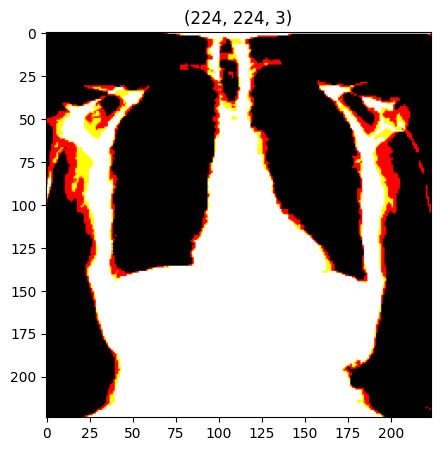

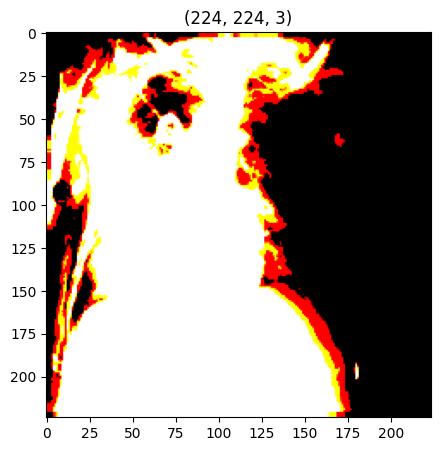

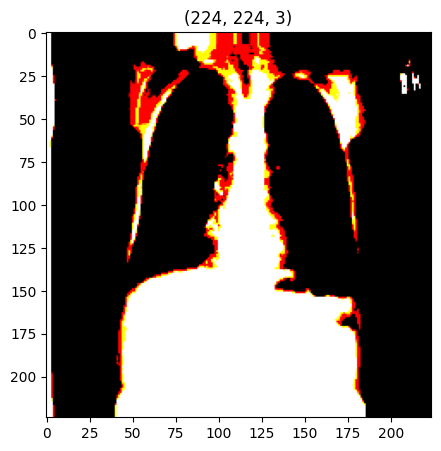

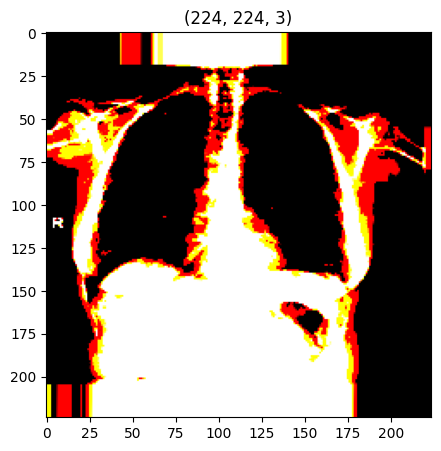

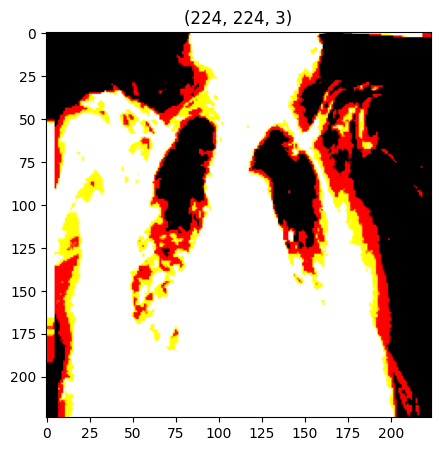

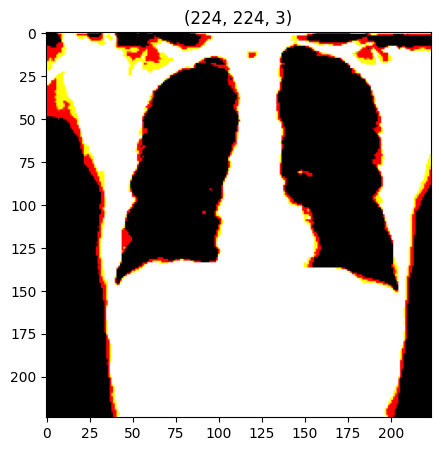

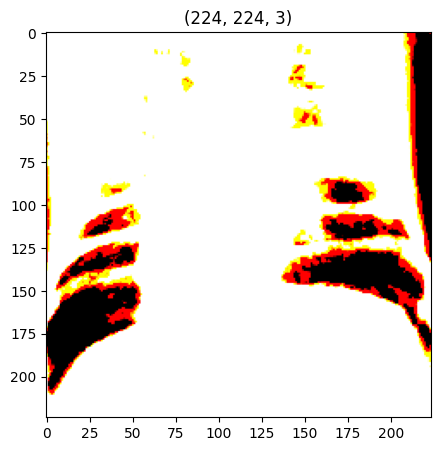

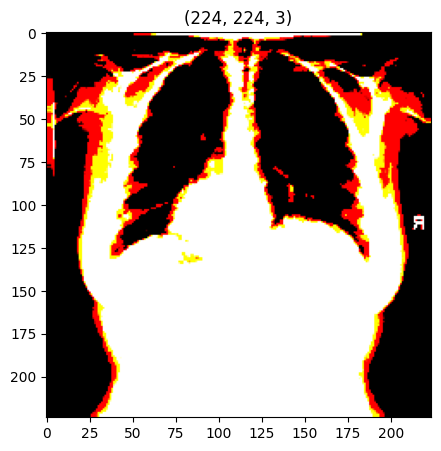

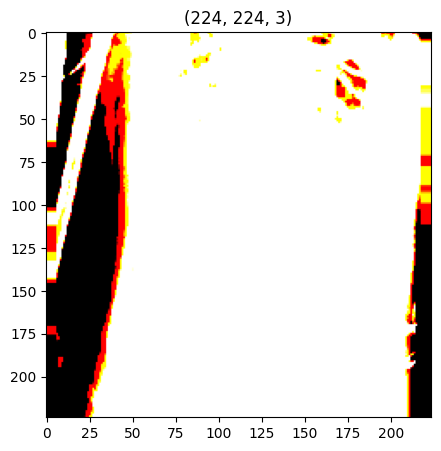

In [17]:
plotImages(t_img, label)

In [18]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [19]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

94765736/94765736 [==============================] - 1s 0us/step


In [20]:
for layer in res.layers:
  layer.trainable = False

In [21]:
x = Flatten()(res.output)
x = Dense(units=4 , activation='sigmoid', name = 'predictions' )(x)


model = Model(res.input, x)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [23]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [25]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

<ipython-input-25-673b6a6f7538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 13.8088 - accuracy: 0.5750
Epoch 1: val_accuracy improved from -inf to 0.70898, saving model to bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 185s 19s/step - loss: 13.8088 - accuracy: 0.5750 - val_loss: 9.1706 - val_accuracy: 0.7090
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 7.6590 - accuracy: 0.7312
Epoch 2: val_accuracy did not improve from 0.70898
10/10 [==============================] - 221s 23s/step - loss: 7.6590 - accuracy: 0.7312 - val_loss: 5.2069 - val_accuracy: 0.7012
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 4.5128 - accuracy: 0.7188
Epoch 3: val_accuracy improved from 0.70898 to 0.72461, saving model to bestmodel.h5
10/10 [==============================] - 215s 23s/step - loss: 4.5128 - accuracy: 0.7188 - val_loss: 4.6232 - val_accuracy: 0.7246
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 4.9877 - accuracy: 0.7063
Epoch 4: val_accuracy improved from 0.72461 to 0.74219, saving model to bestmodel.h5
10/10 [==============================] - 216s 23s/step - loss: 4.9877 - accuracy: 0.7063 - val_loss: 4.

In [26]:
from keras.models import load_model
model = load_model("bestmodel.h5")


In [27]:
acc = model.evaluate(test)[1]

print(f"The accuracy of your model is = {acc} %")

100/100 [==============================] - 736s 7s/step - loss: 3.1833 - accuracy: 0.8038
The accuracy of your model is = 0.8037795424461365 %


In [28]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 0s 341ms/step
The given X-Ray image is of type = Lung_Opacity

1/1 [==============================] - 0s 373ms/step
The chances of image being Covid is : 7.822536404719618e-24 percent

1/1 [==============================] - 0s 362ms/step
The chances of image being Normal is : 3.3780784747250436e-05 percent

1/1 [==============================] - 1s 533ms/step
The chances of image being Lung_Opacity is : 100.0 percent

1/1 [==============================] - 1s 700ms/step
The chances of image being Viral Pneumonia is : 51.89235210418701 percent


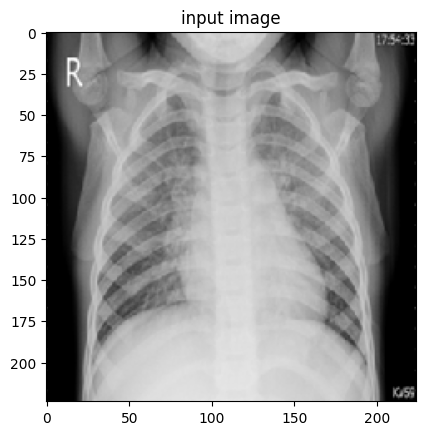

In [30]:
path = "/content/img_dir/train_test_split/validation/Viral Pneumonia/Viral Pneumonia-113.png"

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")
print()
print(f"The chances of image being Lung_Opacity is : {model.predict(img)[0][2]*100} percent")
print()
print(f"The chances of image being Viral Pneumonia is : {model.predict(img)[0][3]*100} percent")

plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [31]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train.classes, y_pred))

463/463 [==============================] - 3171s 7s/step
              precision    recall  f1-score   support

           0       0.17      0.30      0.22      2532
           1       0.29      0.49      0.36      4208
           2       0.49      0.17      0.25      7134
           3       0.06      0.05      0.06       941

    accuracy                           0.28     14815
   macro avg       0.25      0.25      0.22     14815
weighted avg       0.35      0.28      0.27     14815



Normalized confusion matrix


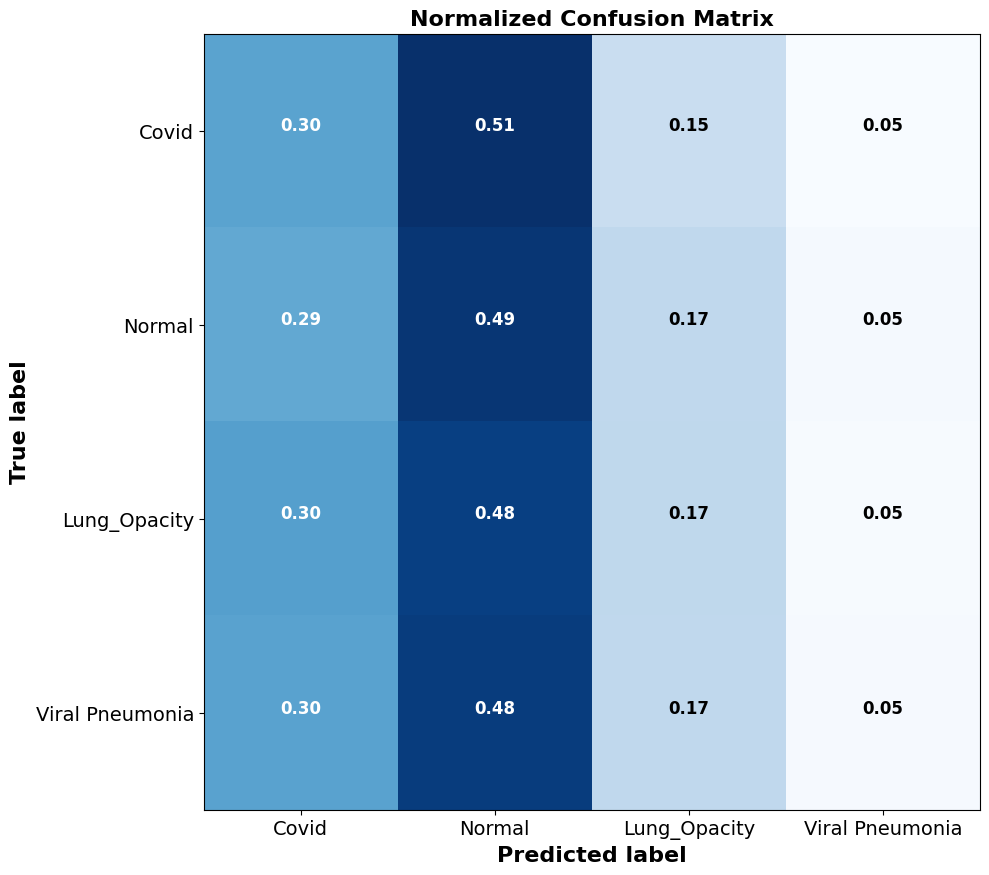

In [38]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without mnormaliation')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, weight='bold', fontsize=16)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, fontsize=14)
  plt.yticks(tick_marks, classes, fontsize=14)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center", fontsize=12, weight='bold',
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')


cnf_matrix = confusion_matrix(train.classes, y_pred)
np.set_printoptions(precision=2)


plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Covid', 'Normal', 'Lung_Opacity', 'Viral Pneumonia'],normalize=True, title='Normalized Confusion Matrix')
plt.show()
